['Avion', 'DELTA_VEL_AJUSTE', 'DISTANCIA_INICIAL', 'Enum', 'EstadoAvion', 'List', 'MIN_SEPARACION', 'PROB_VIENTO', 'RADAR_DIST', 'Simulador', 'SimuladorTormenta', 'SimuladorViento', 'VEL_RETROCESO', 'VENTANA_GAP_MIN', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'aterrizaje_libre', 'hay_gap_disponible', 'np', 'tiempo_entre_aviones', 'vel_maxima_permitida_por_tramo', 'velocidad_minima_permitida_por_tramo']
Total aviones generados: 16
Aterrizados: 0


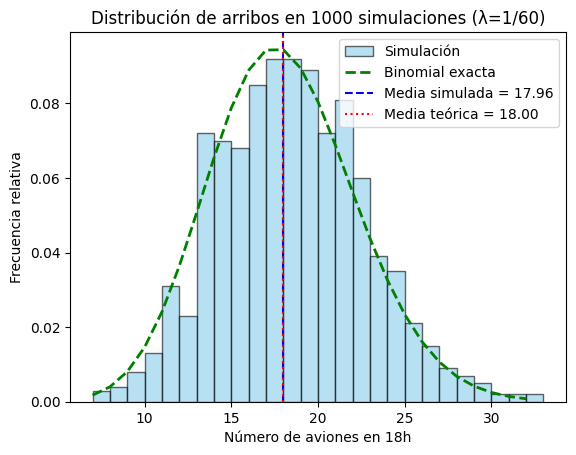

In [1]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import main
print(dir(main))

from main import Simulador, SimuladorViento, vel_maxima_permitida_por_tramo, EstadoAvion


# =========================
# Simulación de un día
# =========================
def correr_un_dia(lam=1/60, seed=42):
    sim = Simulador(seed=seed)
    sim.simular_dia(lam)
    return sim


# =========================
# Monte Carlo de arribos
# =========================
from scipy.stats import binom

def monte_carlo_arribos_binomial(lam=1/60, horas=18, repeticiones=1000):
    rng = np.random.default_rng(42)
    minutos = horas * 60
    p = lam
    mu = minutos * p

    simulados = rng.binomial(minutos, p, size=repeticiones)

    plt.hist(simulados, bins=range(simulados.min(), simulados.max()+2),
             density=True, alpha=0.6, color="skyblue", edgecolor="black",
             label="Simulación")

    x = np.arange(simulados.min(), simulados.max()+1)
    plt.plot(x, binom.pmf(x, minutos, p), "g--", lw=2, label="Binomial exacta")

    plt.axvline(simulados.mean(), color="blue", linestyle="--",
                label=f"Media simulada = {simulados.mean():.2f}")
    plt.axvline(mu, color="red", linestyle=":",
                label=f"Media teórica = {mu:.2f}")

    plt.title("Distribución de arribos en 1000 simulaciones (λ=1/60)")
    plt.xlabel("Número de aviones en 18h")
    plt.ylabel("Frecuencia relativa")
    plt.legend()
    plt.show()



# =========================
# Main
# =========================
if __name__ == "__main__":
    lam = 1/60

    # 1. Simulación base
    sim = correr_un_dia(lam)
    print(f"Total aviones generados: {len(sim.aviones)}")
    aterrizados = [a for a in sim.aviones.values() if a.estado == "ATERRIZADO"]
    print(f"Aterrizados: {len(aterrizados)}")

    # 2. Monte Carlo
    monte_carlo_arribos_binomial(lam, repeticiones=1000)


In [2]:
import math

# Parámetros
n = 1080               # DIA ENTERO
p = 1/60               # probabilidad de arribo por minuto

# Teórico
esperanza = n * p
varianza = n * p * (1 - p)
desvio = math.sqrt(varianza)

print("=== Valores Teóricos ===")
print(f"Esperanza (E[X]) = {esperanza:.2f}")
print(f"Varianza (Var[X]) = {varianza:.2f}")
print(f"Desvío estándar (σ) = {desvio:.2f}")


=== Valores Teóricos ===
Esperanza (E[X]) = 18.00
Varianza (Var[X]) = 17.70
Desvío estándar (σ) = 4.21


# Distribución de arribos en 18 horas

En la simulación se modelaron los arribos de aviones con una probabilidad de arribo por minuto 
$\lambda = 1/60$. Esto corresponde a un proceso Bernoulli repetido $n = 1080$ veces 
(los minutos de 18 horas).  

Por lo tanto, el número de arribos en un día sigue una **Binomial**, ya que es la suma de muchas Bernoullis independientes con la misma probabilidad:

\begin{equation}
X \sim Binomial(n=1080, p=1/60), \quad \mathbb{E}[X] = n \cdot p = 18
\end{equation}


### Resultados Monte Carlo

- Se realizaron 1000 simulaciones de un día completo.  
- La **media simulada** fue 17.96, muy cercana al valor teórico de 18.  
- La **distribución empírica** (histograma) coincide bien con la **Binomial exacta** superpuesta en verde.  

### Interpretación

El resultado tiene sentido porque:  
1. El histograma de Monte Carlo reproduce la forma de la distribución binomial.  
2. La media de las simulaciones es prácticamente igual a la media teórica.  
3. Las pequeñas diferencias se explican por el **error de simulación** (muestra finita).  
4. Como el desvío estándar es aprox. 4 tiene sentido el resultado de montecarlo ya que es (18 ± 4) aviones que aparecen.

En conclusión, el modelo implementado respeta la teoría: los arribos simulados se ajustan a la distribución esperada.


Total aviones generados: 230
Aterrizados: 144


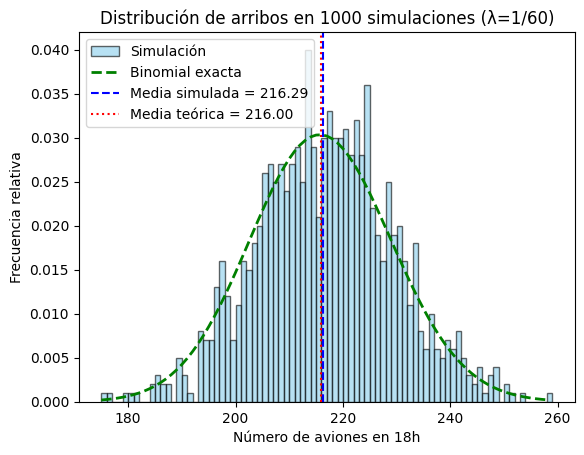

/var/folders/0y/tsllkfts05ngtc3fr0xjb6tm0000gn/T/ipykernel_61104/2728833407.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(ids))


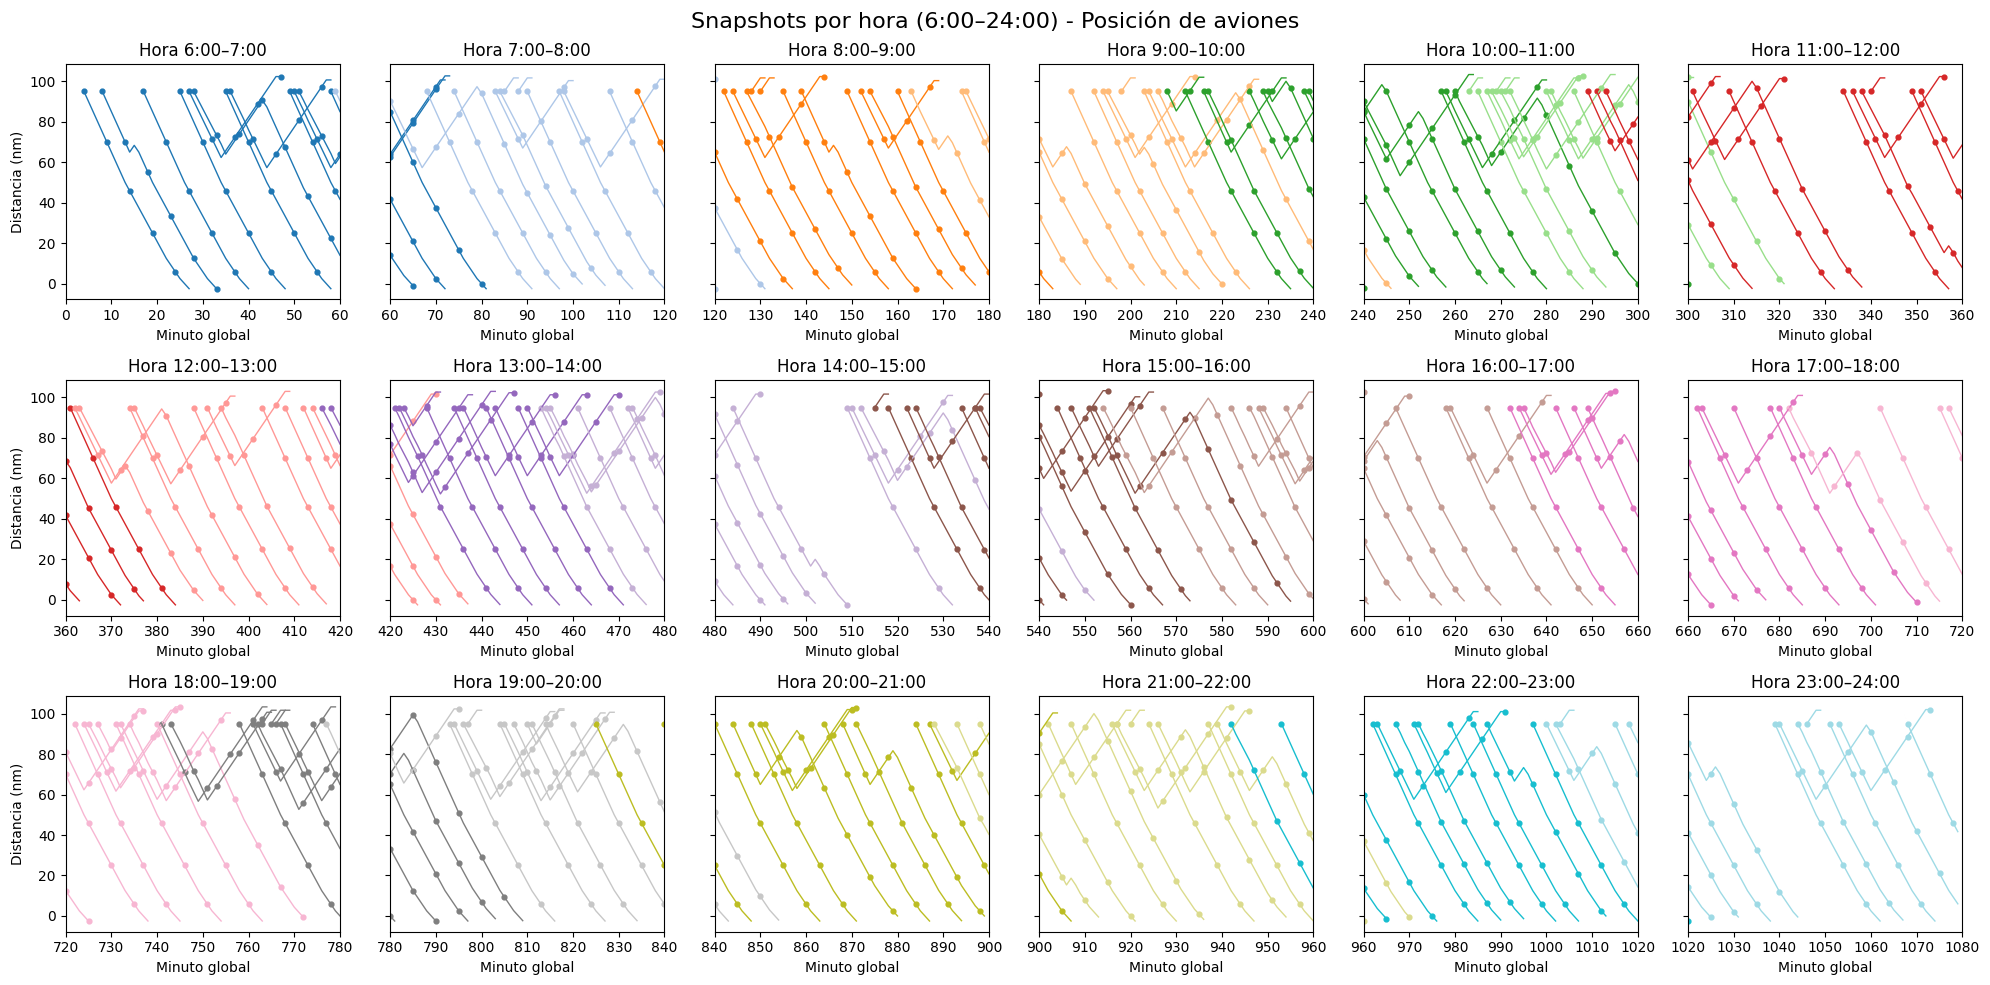

===== 📊 Resumen de la simulación com lam= 0.2 =====
✈️ Total de aviones: 230
✅ Aterrizados: 144
❌ Desviados: 84
🕐 Activos al final: 2
⏱️Suma de minutos de atraso de todos los aviones aterrizados en la simulacion: 443.00000000000034
⏱️Atraso promedio: 3.076388888888891


In [3]:
# ej1.py
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from main import Simulador, RADAR_DIST, MIN_SEPARACION

# =========================
# Simulación de un día
# =========================
def correr_un_dia(lam=1/60, seed=42):
    sim = Simulador(seed=seed)
    sim.simular_dia(lam)
    return sim


# =========================
# Monte Carlo de arribos
# =========================
from scipy.stats import binom

def monte_carlo_arribos_binomial(lam=1/60, horas=18, repeticiones=1000):
    rng = np.random.default_rng(42)
    minutos = horas * 60
    p = lam
    mu = minutos * p

    simulados = rng.binomial(minutos, p, size=repeticiones)

    plt.hist(simulados, bins=range(simulados.min(), simulados.max()+2),
             density=True, alpha=0.6, color="skyblue", edgecolor="black",
             label="Simulación")

    x = np.arange(simulados.min(), simulados.max()+1)
    plt.plot(x, binom.pmf(x, minutos, p), "g--", lw=2, label="Binomial exacta")

    plt.axvline(simulados.mean(), color="blue", linestyle="--",
                label=f"Media simulada = {simulados.mean():.2f}")
    plt.axvline(mu, color="red", linestyle=":",
                label=f"Media teórica = {mu:.2f}")

    plt.title("Distribución de arribos en 1000 simulaciones (λ=1/60)")
    plt.xlabel("Número de aviones en 18h")
    plt.ylabel("Frecuencia relativa")
    plt.legend()
    plt.show()


# =========================
# Snapshots por hora
# =========================
def graficar_snapshots(sim, lamda, duracion_horas=18):
    historial = sim.historial
    ids = set(reg["id"] for reg in historial)
    cmap = cm.get_cmap("tab20", len(ids))
    colores = {id_: cmap(i) for i, id_ in enumerate(ids)}

    fig, axes = plt.subplots(3, 6, figsize=(20, 10), sharey=True)
    axes = axes.flatten()

    for h in range(duracion_horas):
        minuto_ini = h * 60
        minuto_fin = (h + 1) * 60
        ax = axes[h]

        for id_ in ids:
            # historial completo del avión
            registros = [r for r in historial if r["id"] == id_]
            if not registros:
                continue

            # cortar el historial en el primer aterrizaje/desvío
            corte_idx = None
            for i, r in enumerate(registros):
                if r["estado"] in ("ATERRIZADO", "DESVIADO"):
                    corte_idx = i
                    break
            if corte_idx is not None:
                registros = registros[:corte_idx+1]

            # ahora filtro solo la hora correspondiente
            registros = [r for r in registros if minuto_ini <= r["minuto"] <= minuto_fin]
            if registros:
                ts = [r["minuto"] for r in registros]
                ds = [r["distancia"] for r in registros]
                color = colores[id_]
                ax.plot(ts, ds, color=color, linewidth=1)
                ax.scatter(ts[::5], ds[::5], c=[color], s=12)

        ax.invert_yaxis()
        ax.set_xlim(minuto_ini, minuto_fin)
        ax.set_title(f"Hora {6+h}:00–{7+h}:00")
        ax.set_xlabel("Minuto global")
        if h % 6 == 0:
            ax.set_ylabel("Distancia (nm)")

    plt.suptitle("Snapshots por hora (6:00–24:00) - Posición de aviones", fontsize=16)
    plt.tight_layout()
    plt.show()

    # ======================
    # Summary de estados finales
    # ======================
    estados_finales = {"ATERRIZADO": 0, "DESVIADO": 0, "ACTIVO": 0}
    atraso = 0
    for avion in sim.aviones.values():
        if avion.estado == "ATERRIZADO":
            estados_finales["ATERRIZADO"] += 1
            atraso += avion.retraso
        elif avion.estado == "DESVIADO":
            estados_finales["DESVIADO"] += 1
        else:
            estados_finales["ACTIVO"] += 1

    
    atraso_promedio = atraso / estados_finales['ATERRIZADO']
        

    print(f"===== 📊 Resumen de la simulación com lam= {lamda} =====")
    print(f"✈️ Total de aviones: {len(sim.aviones)}")
    print(f"✅ Aterrizados: {estados_finales['ATERRIZADO']}")
    print(f"❌ Desviados: {estados_finales['DESVIADO']}")
    print(f"🕐 Activos al final: {estados_finales['ACTIVO']}")
    print(f"⏱️Suma de minutos de atraso de todos los aviones aterrizados en la simulacion: {atraso}")
    print(f"⏱️Atraso promedio: {atraso_promedio}")



# =========================
# Main
# =========================
if __name__ == "__main__":
    
    lam = 0.2

    # 1. Simulación base
    sim = correr_un_dia(lam)
    print(f"Total aviones generados: {len(sim.aviones)}")
    aterrizados = [a for a in sim.aviones.values() if a.estado == "ATERRIZADO"]
    print(f"Aterrizados: {len(aterrizados)}")

    # 2. Monte Carlo
    monte_carlo_arribos_binomial(lam, repeticiones=1000)

    # 3. Graficar snapshots
    graficar_snapshots(sim, lam)
    
